In [1]:
# 1. Зашумить изображение при помощи:
# a) шума гаусса
# б) постоянного шума

# 2. Протестировать:
# а) медианный фильтр
# б) фильтр гаусса
# в) билатериальный фильтр
# г) фильтр нелокальных средних с различными параметрами

# 3. Выяснить, какой фильтр показал лучший результат фильтрации шума

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

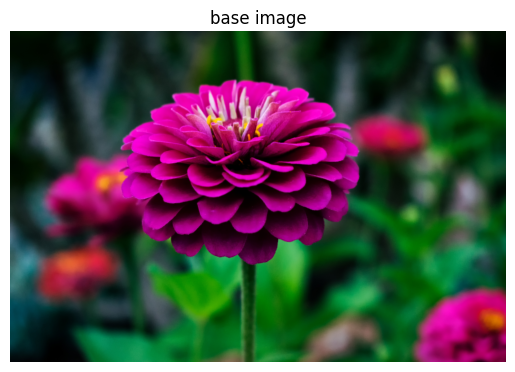

In [3]:
# image = cv2.imread('The_Secret_of_Bone_Hill_art.jpg')
image = cv2.imread('img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("base image")
plt.axis('off')
plt.imshow(image)

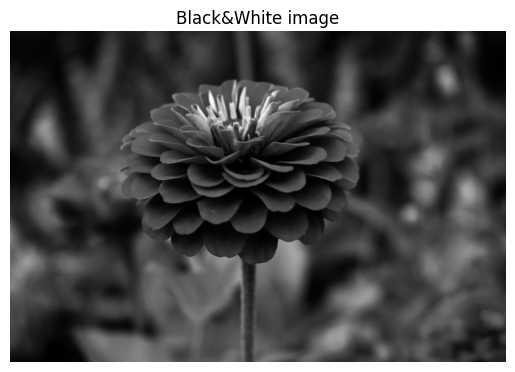

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title("Black&White image")
plt.axis('off')
plt.imshow(image_gray, cmap="gray")

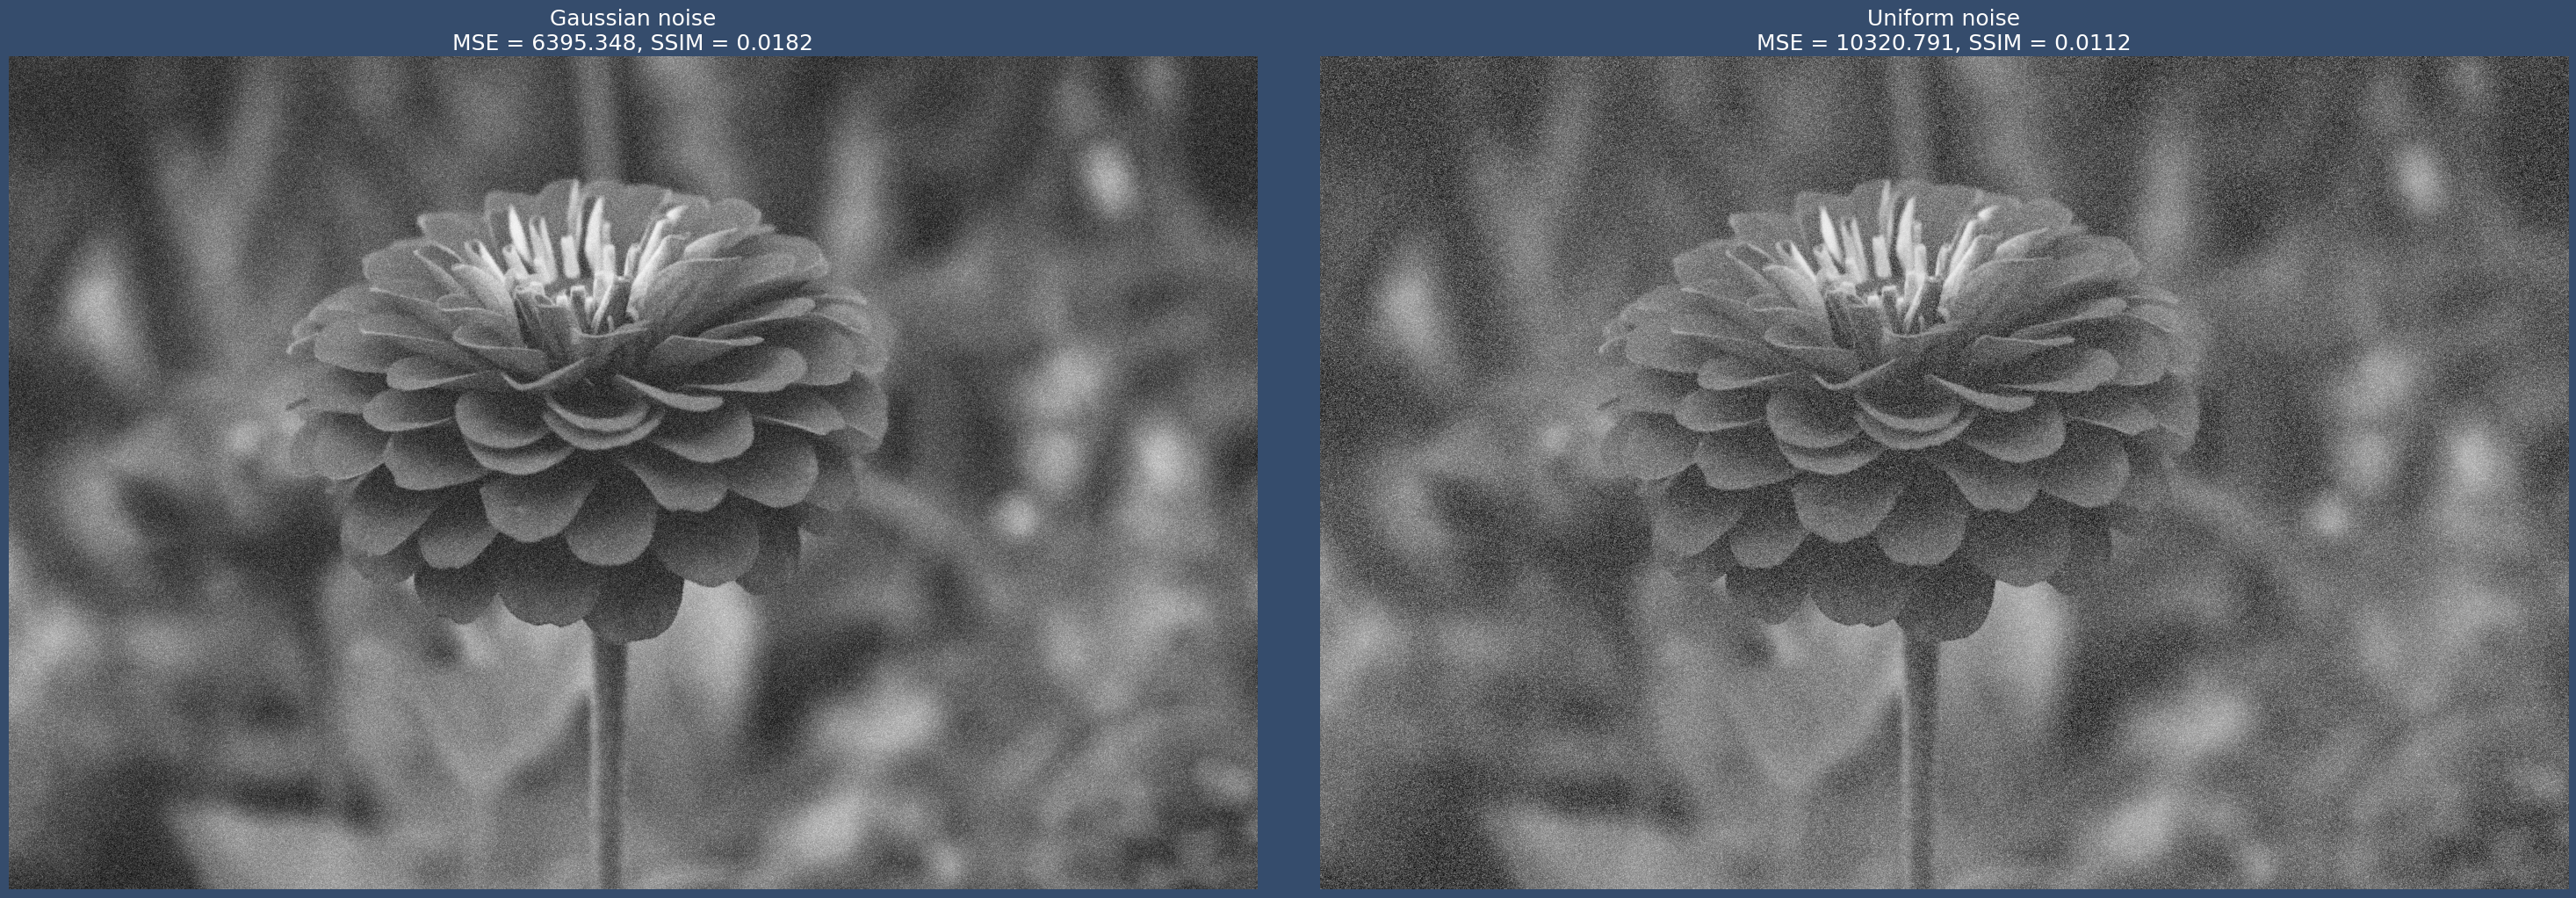

In [5]:
mean = 0
stddev = 127

noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

image_noise_gauss = cv2.add(image_gray, noise_gauss)
image_noise_gauss = np.clip(image_noise_gauss, 0, 255)


a = -2
b = 2
x,y = image_gray.shape

noise = np.random.uniform(a, b, size=image_gray.shape).astype(np.uint8)

image_uniform_noise = cv2.add(image_gray, noise)
image_uniform_noise = np.clip(image_uniform_noise, 0, 255)

plt.figure(figsize=(30, 10), facecolor='#354c6c')

mse = mean_squared_error(image_gray, image_noise_gauss)
(ssim, _) = structural_similarity(image_gray, image_noise_gauss, full=True)

plt.subplot(1, 2, 1)
plt.title(f'Gaussian noise\nMSE = {mse:.3f}, SSIM = {ssim:.4f}', color='white', fontsize=18)
plt.axis('off')
plt.imshow(image_noise_gauss, cmap='gray')

mse = mean_squared_error(image_gray, image_uniform_noise)
(ssim, _) = structural_similarity(image_gray, image_uniform_noise, full=True)

plt.subplot(1, 2, 2)
plt.title(f'Uniform noise\nMSE = {mse:.3f}, SSIM = {ssim:.4f}', color='white', fontsize=18)
plt.axis('off')
plt.imshow(image_uniform_noise, cmap='gray')

plt.tight_layout()
plt.show()

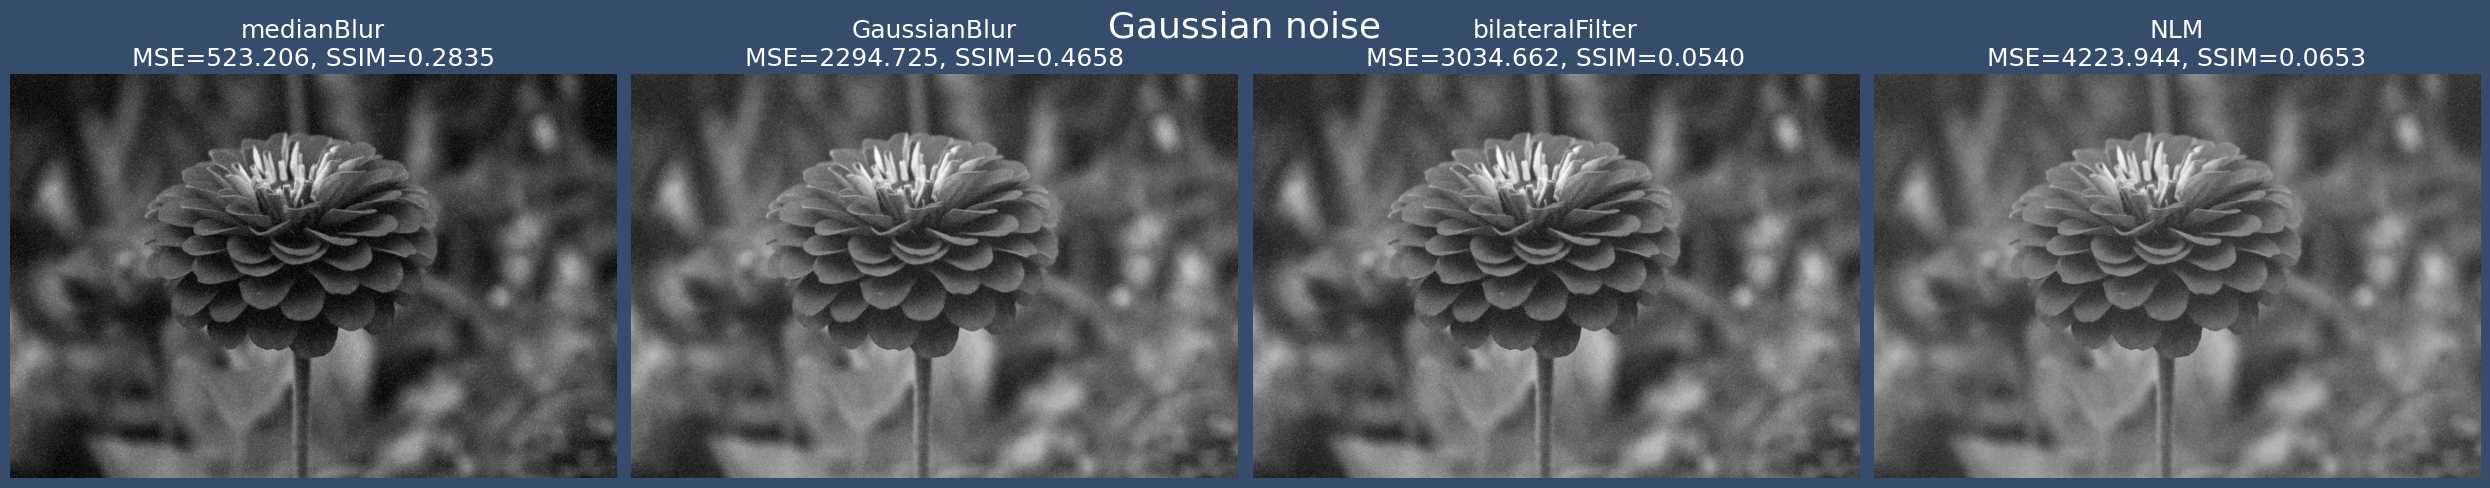

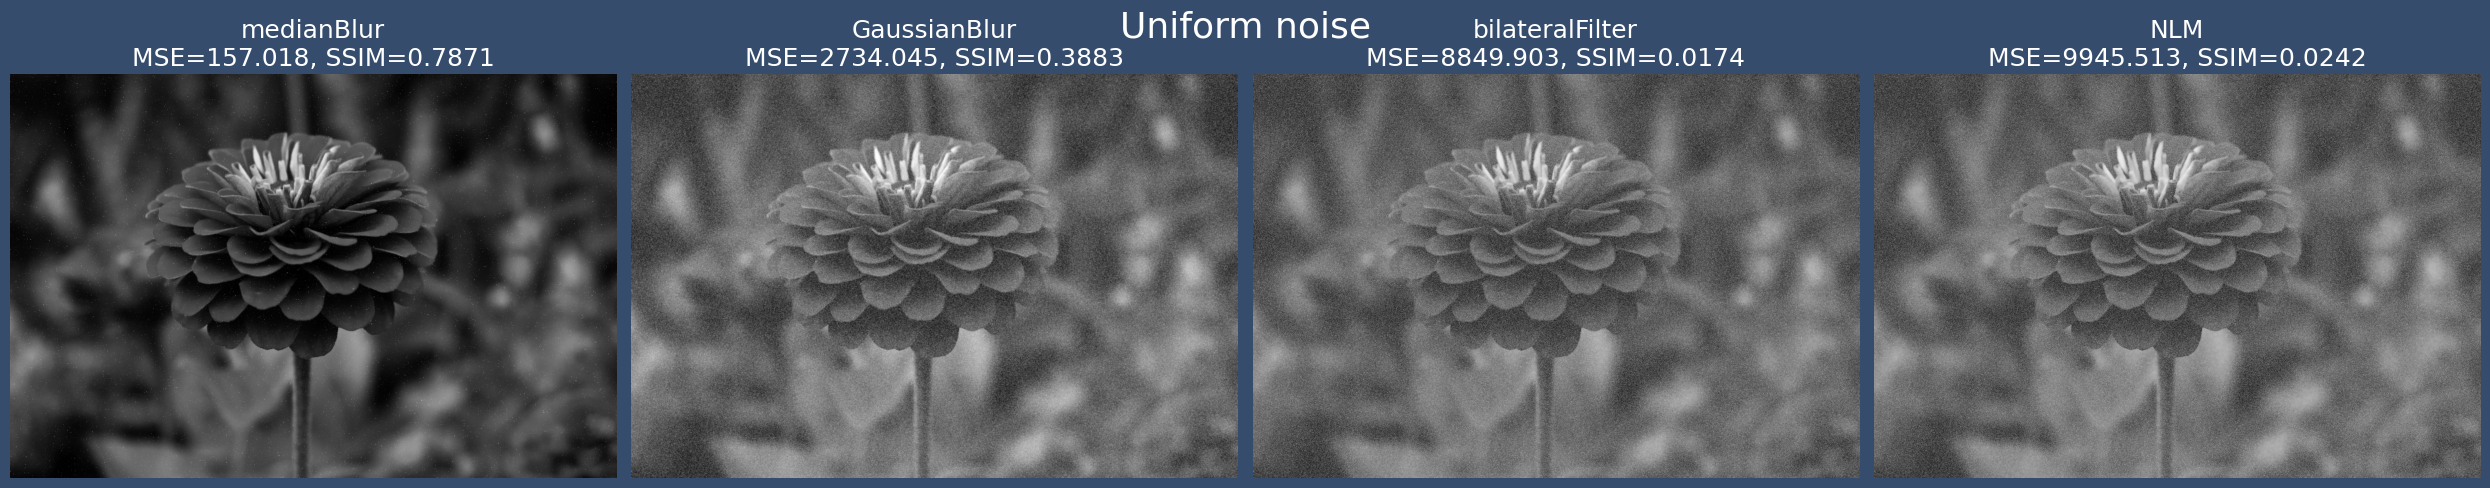

In [6]:
noises_images = [
    ('Gaussian noise', image_noise_gauss), 
    ('Uniform noise', image_uniform_noise)
]

for i, (noise_name, noise_img) in enumerate(noises_images):
    plt.figure(figsize=(25, 5), facecolor='#354c6c')
    plt.suptitle(f'{noise_name}', color='white', fontsize=26)
    processed_images = [
        ('medianBlur', cv2.medianBlur(noise_img,5)),
        ('GaussianBlur', cv2.GaussianBlur(noise_img,(13,13),0)),
        ('bilateralFilter', cv2.bilateralFilter(noise_img,15, 75, 75)),
        ('NLM', cv2.fastNlMeansDenoising(noise_img, h = 35))
    ]
    for j, (filter_name, processed_img) in enumerate(processed_images):
        plt.subplot(1, len(processed_images), j+1)
        mse = mean_squared_error(image_gray, processed_img)
        (ssim, diff) = structural_similarity(image_gray, processed_img, full=True)
        plt.title(f'{filter_name}\nMSE={mse:.3f}, SSIM={ssim:.4f}', color='white', fontsize=18)
        plt.axis('off')
        plt.imshow(processed_img, cmap='gray')
    plt.tight_layout()
    plt.show()